In [20]:
from prody import *


In [39]:
from pylab import *

In [40]:
protein = parsePDB('2qvb' , chain='A')

@> Connecting wwPDB FTP server RCSB PDB (USA).
@> 2qvb downloaded (2qvb.pdb.gz)
@> PDB download via FTP completed (1 downloaded, 0 failed).
@> 2669 atoms and 1 coordinate set(s) were parsed in 0.17s.
@> Secondary structures were assigned to 210 residues.


In [41]:
selection = protein.select('name CA')

In [42]:
gnm = GNM('protein')

In [43]:
gnm.buildKirchhoff(selection)

@> Kirchhoff was built in 0.04s.


In [44]:
gnm.calcModes(n_modes='all')

@> 295 modes were calculated in 0.06s.


In [45]:
from prody import calcDynamicFlexibilityIndex

In [46]:
atoms = selection

In [47]:
select = 'protein'

In [48]:
dfi = calcDynamicFlexibilityIndex(gnm, atoms, select)

In [49]:
with open('dfi.npy', 'wb')as f:
    ...:     np.save(f, dfi)

In [50]:
print(dfi)

[-5.75372024 -7.28571429 -6.42857143 -6.5        -4.42857143 -2.71428571
 -0.57142857 -1.9047619  -0.76190476 -0.38095238  0.57142857  0.57142857
  0.85714286  1.23809524  1.33333333  0.85714286  0.85714286  0.47619048
  0.38095238  0.0952381   0.28571429 -0.38095238  0.47619048  0.66666667
  1.52380952  1.9047619   2.38095238  2.47619048  1.80952381  1.57142857
  1.23809524  0.23809524  0.23809524 -0.47619048 -0.30952381 -0.51190476
 -1.         -1.30952381 -0.71428571 -0.95238095 -2.57142857 -1.83333333
 -1.66666667 -2.71428571 -3.28571429 -1.4047619  -0.42857143 -0.71428571
 -0.52380952  1.57142857  1.47619048  1.23809524  2.47619048  2.
  1.71428571  1.14285714  1.14285714 -0.38095238  0.19047619 -0.23809524
 -0.04761905  0.28571429  0.19047619 -0.52380952 -0.76190476 -0.0952381
 -0.          0.28571429  0.14285714  0.66666667  1.04761905  1.85714286
  0.71428571  0.83333333  0.66666667  1.26190476  1.14285714  0.61904762
  0.73809524  0.5         1.14285714  1.23809524  1.        

In [51]:

resnames_and_nums = list(zip(atoms.getResnames(), atoms.getResnums()))

dfi_residues = [(resname, resnum) for (resname, resnum), value in zip(resnames_and_nums, dfi)]
dfi_residues = [(resname, resnum) for (resname, resnum), value in zip(resnames_and_nums, dfi)]


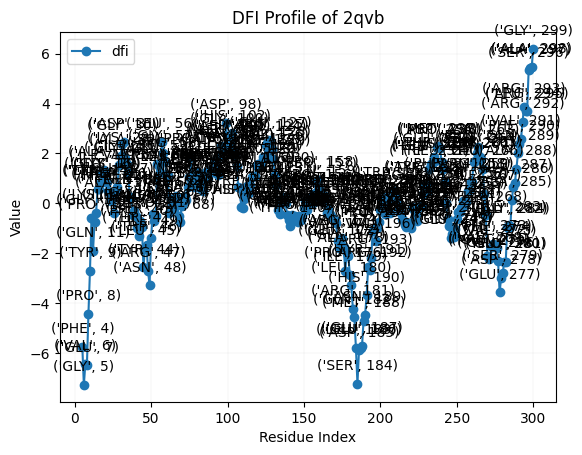

<Figure size 1000x600 with 0 Axes>

In [52]:
import matplotlib.pyplot as plt
    ...: import numpy as np
    ...: 
    ...: 
    ...: fig, ax = plt.subplots()
    ...: 
    ...: x_values = np.arange(5, 5 + len(dfi))
    ...: 
    ...
    ...: ax.plot(x_values, dfi, label='dfi', marker='o')
    ...: 
    ...: 
    ...:
    ...: for i, value in enumerate(dfi_residues):
    ...:     ax.annotate(value, (i+5, dfi[i]), textcoords="offset points", xytext=(0,10), ha='center')
    ...: 
    ...: grid(b=True, which='both', axis='both', linewidth=0.08)
    ...: x = np.linspace(0, 10, 20)
    ...: plt.xticks(np.arange(min(x), max(x)+300, 50))
    ...: 
    ...: 
    ...: y = np.linspace(0, 10, 100)
    ...: 
    ...: 
    ...: 
    ...: 
    ...: ax.legend()
    ...: ax.set_xlabel('Residue Index')
    ...: ax.set_ylabel('Value')
    ...: ax.set_title('DFI Profile of 2qvb')
    ...: plt.figure(figsize=(10, 6))

    ...: 

    ...: plt.show()

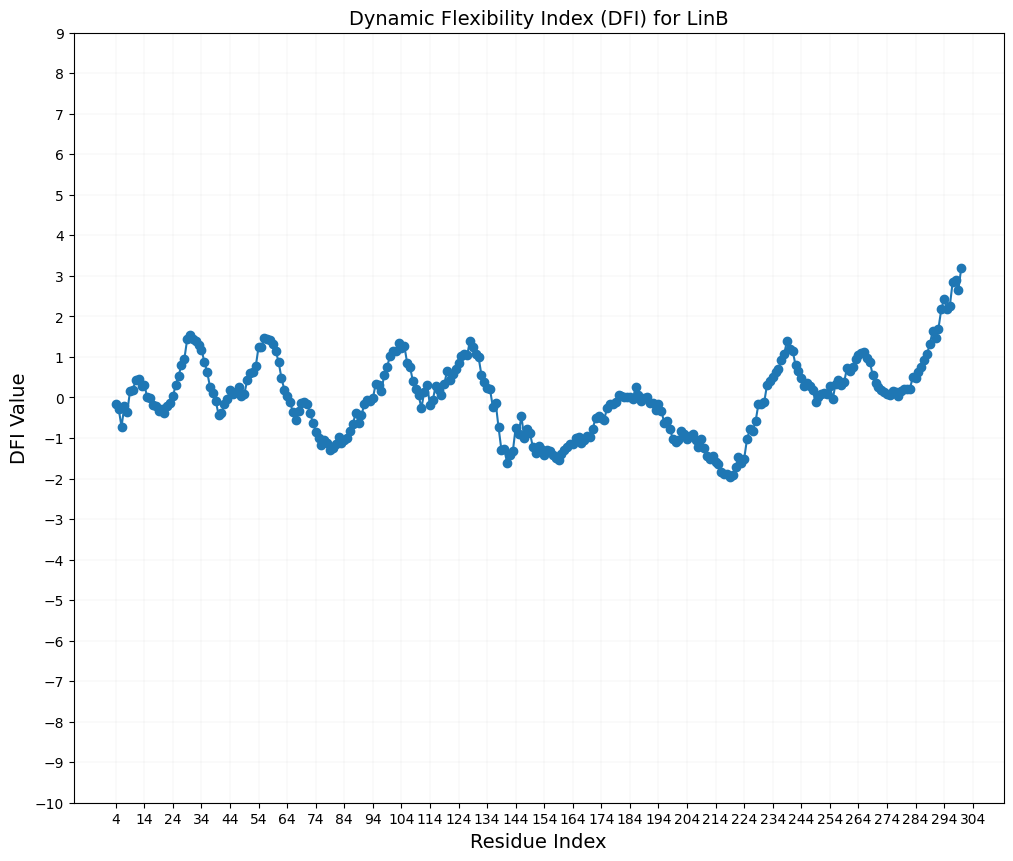

In [35]:
import numpy as np
    ...: import matplotlib.pyplot as plt
    ...: 


residue_mapping = {
    "ALA": "A",
    "CYS": "C",
    "ASP": "D",
    "GLU": "E",
    "PHE": "F",
    "GLY": "G",
    "HIS": "H",
    "ILE": "I",
    "LYS": "K",
    "LEU": "L",
    "MET": "M",
    "ASN": "N",
    "PRO": "P",
    "GLN": "Q",
    "ARG": "R",
    "SER": "S",
    "THR": "T",
    "VAL": "V",
    "TRP": "W",
    "TYR": "Y"
}
    ...: 
    ...: dfi_values = np.load('dfi.npy')
    ...: fig, ax = plt.subplots(figsize=(12, 10), dpi=100)

x_values = np.arange(4, 4 + len(dfi_values))

ax.plot(x_values, dfi_values, marker='o', linestyle='-')

subset_color = 'red'
for i, value_tuple in enumerate(dfi_residues):
    if -5>= dfi_values[i] >= -7:
        
        value = value_tuple[0]
       
        one_letter_code = residue_mapping.get(value.upper(), "?")
       
        label = f"{one_letter_code} {i+4}"
        ax.annotate(label, (i+4, dfi_values[i]), textcoords="offset points", xytext=(2,10), ha='center', fontsize=16)
        ax.plot(i+4, dfi_values[i], marker='o', linestyle='', color=subset_color)

grid(b=True, which='both', axis='both', linewidth=0.08)
x = np.linspace(0, 10, 20)
plt.xticks(np.arange(min(x)+4, max(x)+300, 10))

y = np.linspace(-10, 10, 100)
plt.yticks(np.arange(min(y), max(y), 1))

ax.set_xlabel('Residue Index', fontsize=14)
ax.set_ylabel('DFI Value', fontsize=14)
ax.set_title('Dynamic Flexibility Index (DFI) for LinB', fontsize=14)

plt.show()


In [36]:
import matplotlib.pyplot as plt
import numpy as np
    ...: 
    ...: dfi_values = np.load('dfi.npy')
    ...: 
    ...: 
    ...: residues = np.arange(1, len(dfi_values) + 1)
    ...: 
    ...: 
         
    ...: plt.figure(figsize=(10, 6))
    ...: plt.plot(residues, dfi_values, marker='o')
    ...: plt.xlabel('Residue Number')
    ...: plt.ylabel('DFI Value')
    ...: plt.title('Dynamic Flexibility Index (DFI) for 2qvb')
    ...: plt.grid(True)
    ...: plt.show()

IndentationError: unexpected indent (1933284072.py, line 3)

In [37]:
for (resname, resnum), value in zip(resnames_and_nums, dfi):
    print(f"Residue {resnum} ({resname}): dfi = {value}")

Residue 3 (ALA): dfi = -0.15853658536585366
Residue 4 (PHE): dfi = -0.2820121951219512
Residue 5 (GLY): dfi = -0.7195121951219512
Residue 6 (VAL): dfi = -0.21951219512195122
Residue 7 (GLU): dfi = -0.36585365853658536
Residue 8 (PRO): dfi = 0.17073170731707318
Residue 9 (TYR): dfi = 0.1951219512195122
Residue 10 (GLY): dfi = 0.43902439024390244
Residue 11 (GLN): dfi = 0.4634146341463415
Residue 12 (PRO): dfi = 0.2926829268292683
Residue 13 (LYS): dfi = 0.3170731707317073
Residue 14 (TYR): dfi = -0.0
Residue 15 (LEU): dfi = -0.024390243902439025
Residue 16 (GLU): dfi = -0.1951219512195122
Residue 17 (ILE): dfi = -0.21951219512195122
Residue 18 (ALA): dfi = -0.34146341463414637
Residue 19 (GLY): dfi = -0.2926829268292683
Residue 20 (LYS): dfi = -0.3902439024390244
Residue 21 (ARG): dfi = -0.21951219512195122
Residue 22 (MET): dfi = -0.14634146341463414
Residue 23 (ALA): dfi = 0.024390243902439025
Residue 24 (TYR): dfi = 0.3170731707317073
Residue 25 (ILE): dfi = 0.5365853658536586
Residu

In [38]:
writePDB('2qvb_DFI.pdb', selection, beta=dfi)

'2qvb_DFI.pdb'